In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas_datareader.data import DataReader
from datetime import datetime

In [4]:
SH = DataReader('000001.SS',data_source = 'yahoo',start = '2010-01-01',end=datetime.now())

In [7]:
print(type(SH))
print(SH)
print(dir(SH))
print(SH.shape)

<class 'pandas.core.frame.DataFrame'>
                   High          Low         Open        Close    Volume  \
Date                                                                       
2010-01-04  3295.279053  3243.319092  3289.750000  3243.760010  109400.0   
2010-01-05  3290.511963  3221.461914  3254.468018  3282.178955  126200.0   
2010-01-06  3295.867920  3253.043945  3277.517090  3254.215088  123600.0   
2010-01-07  3268.819092  3176.707031  3253.990967  3192.775879  128600.0   
2010-01-08  3198.919922  3149.017090  3177.259033  3195.997070   98400.0   
...                 ...          ...          ...          ...       ...   
2020-06-01  2917.150879  2871.964111  2871.964111  2915.430908  260200.0   
2020-06-02  2926.358887  2909.127930  2916.316895  2921.397949  256100.0   
2020-06-03  2942.760010  2922.660889  2930.391113  2923.371094  255700.0   
2020-06-04  2932.968018  2910.751953  2931.837891  2919.250977  226600.0   
2020-06-05  2930.799072  2909.117920  2923.188965 

In [10]:
print(SH.index)

DatetimeIndex(['2010-01-04', '2010-01-05', '2010-01-06', '2010-01-07',
               '2010-01-08', '2010-01-11', '2010-01-12', '2010-01-13',
               '2010-01-14', '2010-01-15',
               ...
               '2020-05-25', '2020-05-26', '2020-05-27', '2020-05-28',
               '2020-05-29', '2020-06-01', '2020-06-02', '2020-06-03',
               '2020-06-04', '2020-06-05'],
              dtype='datetime64[ns]', name='Date', length=2531, freq=None)


In [18]:
SH.insert(6,'RSI', 0)
SH.insert(7,'RSIgains', 0)
SH.insert(8,'RSIlosses', 0)
print(SH.columns)

Index(['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close', 'RSI',
       'RSIgains', 'RSIlosses'],
      dtype='object')


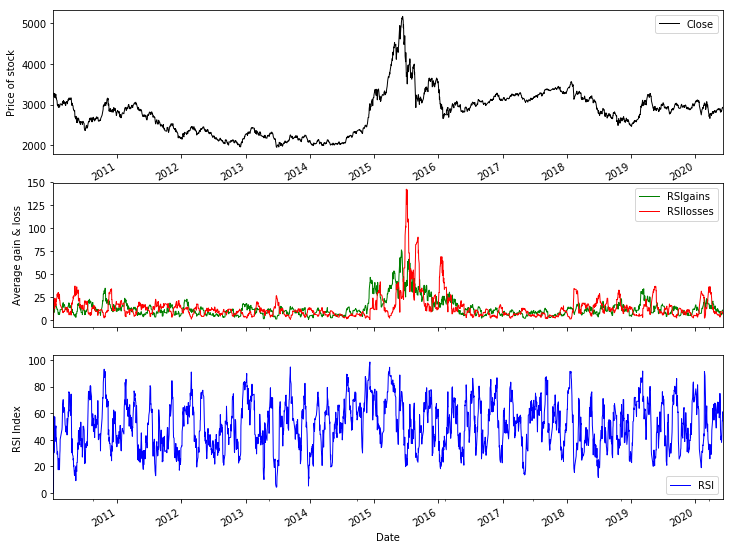

In [23]:
def RSIprinter(SH, time_length):
    gain = []
    loss = []
    avg_gain = []
    avg_loss = []
    results = []
    last_price = 0
    for close in SH['Close']:
        if last_price == 0:
            last_price = close

        gain.append(max(0, close - last_price))
        loss.append(max(0, last_price - close))
        last_price = close

        if len(gain) > time_length:
            del (gain[0])
            del (loss[0])
        gain1 = np.mean(gain) 
        loss1 = np.mean(loss) 
        avg_gain.append(gain1)
        avg_loss.append(loss1)

        temp = 0
        if loss1 > 0: 
            temp = gain1 / loss1

        result = 100 - (100 / (1 + temp))
        results.append(result)

    SH = SH.assign(RSIgains=pd.Series(avg_gain, index=SH.index))
    SH = SH.assign(RSIlosses=pd.Series(avg_loss, index=SH.index))
    SH = SH.assign(RSI=pd.Series(results, index=SH.index))

    fig = plt.figure(figsize=(12, 10))
    pic1 = fig.add_subplot(311, ylabel='Price of stock')
    SH['Close'].plot(ax=pic1, color='black', lw=1., legend=True)
    pic2 = fig.add_subplot(312, ylabel='Average gain & loss', sharex=ax1)
    SH['RSIgains'].plot(ax=pic2, color='g', lw=1., legend=True)
    SH['RSIlosses'].plot(ax=pic2, color='r', lw=1., legend=True)

    pic3 = fig.add_subplot(313, ylabel='RSI Index', sharex=ax1)
    SH['RSI'].plot(ax=pic3, color='b', lw=1., legend=True)
    plt.show()
    
    return SH

result = RSIprinter(SH, 14)

In [24]:
print(result.columns)
print(result)

Index(['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close', 'RSI',
       'RSIgains', 'RSIlosses'],
      dtype='object')
                   High          Low         Open        Close    Volume  \
Date                                                                       
2010-01-04  3295.279053  3243.319092  3289.750000  3243.760010  109400.0   
2010-01-05  3290.511963  3221.461914  3254.468018  3282.178955  126200.0   
2010-01-06  3295.867920  3253.043945  3277.517090  3254.215088  123600.0   
2010-01-07  3268.819092  3176.707031  3253.990967  3192.775879  128600.0   
2010-01-08  3198.919922  3149.017090  3177.259033  3195.997070   98400.0   
...                 ...          ...          ...          ...       ...   
2020-06-01  2917.150879  2871.964111  2871.964111  2915.430908  260200.0   
2020-06-02  2926.358887  2909.127930  2916.316895  2921.397949  256100.0   
2020-06-03  2942.760010  2922.660889  2930.391113  2923.371094  255700.0   
2020-06-04  2932.968018  2910.751953  29